In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
from sklearn.preprocessing import Binarizer

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [4]:
df['Admission'] = df['Chance of Admit '] > 0.9
df['Admission'] = df['Admission'].astype(int)

In [5]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = df['Admission']

In [6]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.25, random_state=0)

In [9]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [11]:
pred_y = model.predict(Xtest)

In [12]:
print(classification_report(Ytest, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00         6

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



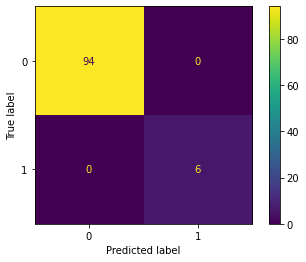

In [13]:
ConfusionMatrixDisplay(confusion_matrix(Ytest, pred_y)).plot()

In [14]:
print(accuracy_score(Ytest, pred_y))

1.0


In [15]:
print(Xtest.shape, Ytest.shape, Xtrain.shape, Ytrain.shape)

(100, 7) (100,) (300, 7) (300,)


In [16]:
from sklearn.tree import plot_tree

[]

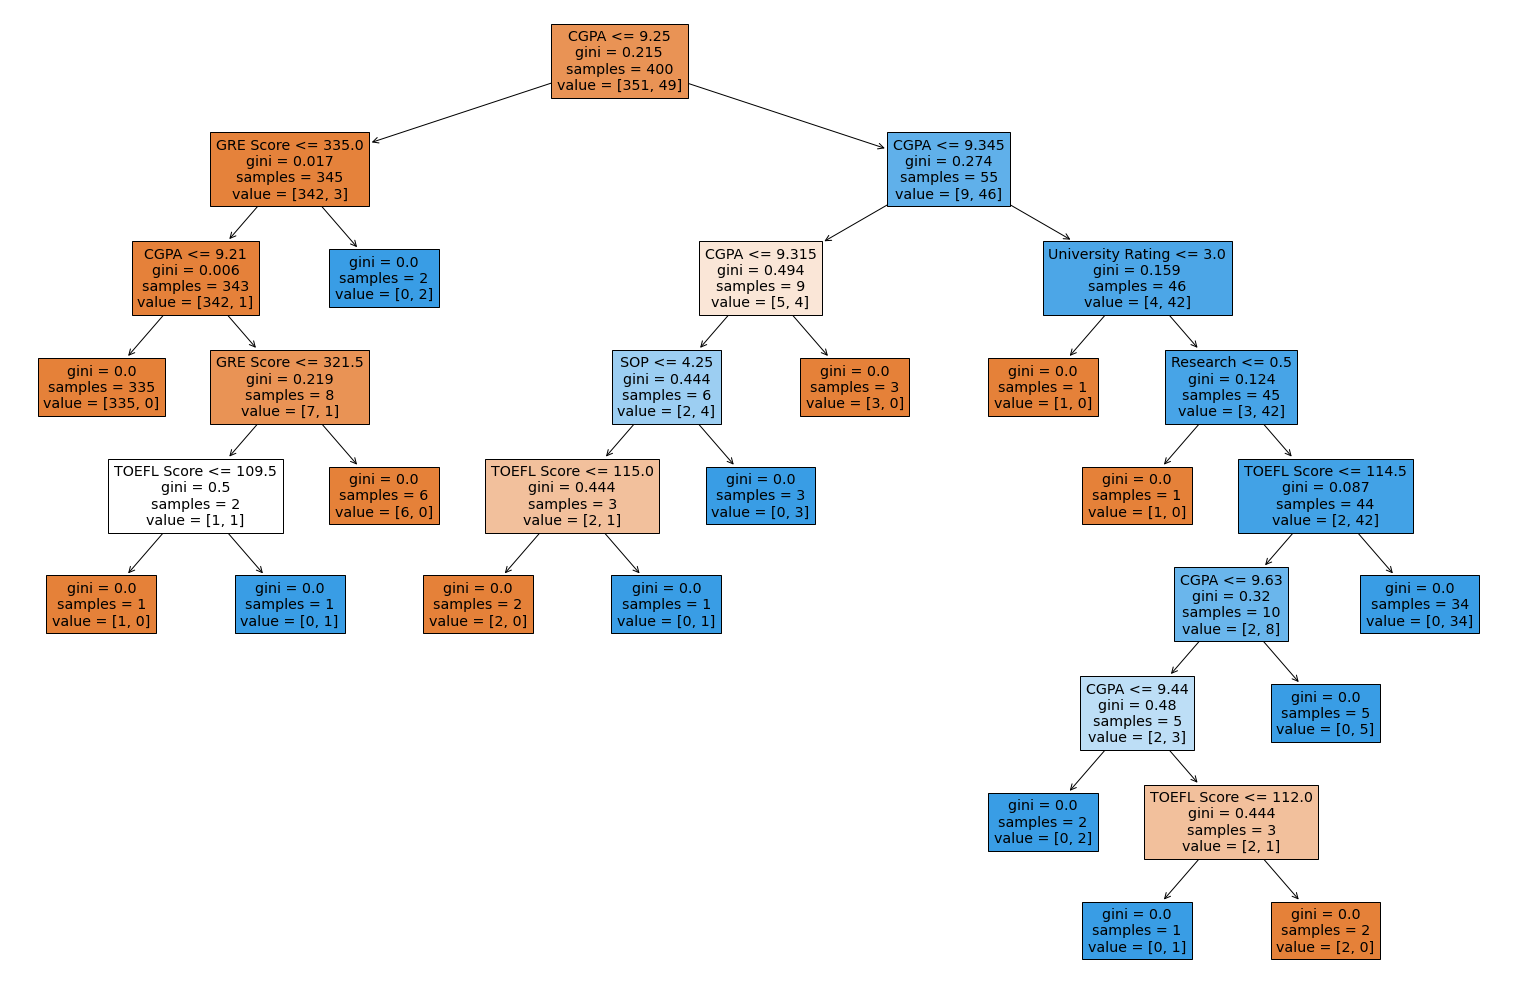

In [17]:
plot.figure(figsize=(9*3, 6*3))
plot_tree(model,filled=True, feature_names=Xtrain.columns.to_list())
plot.plot()

In [30]:
test = pd.DataFrame([[0, 120, 5, 5 , 5, 9.2, 2]],columns=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research'])
print('Can get admission:', model.predict(test)[0])

Can get admission: 0
